# PE: Ensemble - Bagging Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Load the dataset from an Excel file
df = pd.read_csv('Emp_Attrition.csv')

# Display the first few rows of the dataset
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,1102.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,...,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49.0,No,279.0,8.0,1.0,1.0,2.0,3.0,2.0,2.0,...,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,1373.0,2.0,2.0,1.0,4.0,4.0,2.0,1.0,...,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,No,1392.0,3.0,4.0,1.0,5.0,4.0,3.0,1.0,...,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,No,591.0,2.0,1.0,1.0,7.0,1.0,3.0,1.0,...,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0


# Perform EDA

In [4]:
# Check for missing values
df.isna().sum()

Age                         524
Attrition                   524
DailyRate                   524
DistanceFromHome            524
Education                   524
EmployeeCount               524
EmployeeNumber              524
EnvironmentSatisfaction     524
JobInvolvement              524
JobLevel                    524
JobSatisfaction             524
MonthlyIncome               524
MonthlyRate                 524
NumCompaniesWorked          524
PercentSalaryHike           524
PerformanceRating           524
RelationshipSatisfaction    524
StandardHours               524
StockOptionLevel            524
TotalWorkingYears           524
TrainingTimesLastYear       524
WorkLifeBalance             524
YearsAtCompany              524
YearsInCurrentRole          524
YearsSinceLastPromotion     524
YearsWithCurrManager        524
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       210 non-null    float64
 1   Attrition                 210 non-null    object 
 2   DailyRate                 210 non-null    float64
 3   DistanceFromHome          210 non-null    float64
 4   Education                 210 non-null    float64
 5   EmployeeCount             210 non-null    float64
 6   EmployeeNumber            210 non-null    float64
 7   EnvironmentSatisfaction   210 non-null    float64
 8   JobInvolvement            210 non-null    float64
 9   JobLevel                  210 non-null    float64
 10  JobSatisfaction           210 non-null    float64
 11  MonthlyIncome             210 non-null    float64
 12  MonthlyRate               210 non-null    float64
 13  NumCompaniesWorked        210 non-null    float64
 14  PercentSal

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       210 non-null    float64
 1   Attrition                 210 non-null    object 
 2   DailyRate                 210 non-null    float64
 3   DistanceFromHome          210 non-null    float64
 4   Education                 210 non-null    float64
 5   EmployeeCount             210 non-null    float64
 6   EmployeeNumber            210 non-null    float64
 7   EnvironmentSatisfaction   210 non-null    float64
 8   JobInvolvement            210 non-null    float64
 9   JobLevel                  210 non-null    float64
 10  JobSatisfaction           210 non-null    float64
 11  MonthlyIncome             210 non-null    float64
 12  MonthlyRate               210 non-null    float64
 13  NumCompaniesWorked        210 non-null    float64
 14  PercentSal

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,210.000000,210.000000,210.000000,210.000000,210.0,210.000000,210.000000,210.000000,210.000000,210.000000,...,210.000000,210.0,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,37.180952,843.523810,9.376190,2.809524,1.0,154.390476,2.661905,2.733333,2.000000,2.757143,...,2.847619,80.0,0.723810,11.147619,2.719048,2.752381,7.014286,4.414286,2.171429,4.190476
std,9.744370,411.017784,8.265128,1.026866,0.0,145.187521,1.037561,0.695394,1.106743,1.103744,...,1.100508,0.0,0.852749,7.908092,1.272499,0.695590,6.669561,3.976580,3.272203,3.676110
min,19.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,526.500000,2.000000,2.000000,1.0,68.500000,2.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.250000
50%,35.000000,863.000000,7.000000,3.000000,1.0,139.500000,3.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,9.500000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1213.250000,14.000000,4.000000,1.0,213.250000,3.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.750000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,59.000000,1496.000000,29.000000,5.000000,1.0,1018.000000,4.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.dtypes

Age                         float64
Attrition                    object
DailyRate                   float64
DistanceFromHome            float64
Education                   float64
EmployeeCount               float64
EmployeeNumber              float64
EnvironmentSatisfaction     float64
JobInvolvement              float64
JobLevel                    float64
JobSatisfaction             float64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     float64
YearsWithCurrManager        float64
dtype: object

In [9]:
df.shape

(734, 26)

In [10]:
# Lable Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,1102.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,...,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49.0,0,279.0,8.0,1.0,1.0,2.0,3.0,2.0,2.0,...,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,1,1373.0,2.0,2.0,1.0,4.0,4.0,2.0,1.0,...,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,0,1392.0,3.0,4.0,1.0,5.0,4.0,3.0,1.0,...,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,0,591.0,2.0,1.0,1.0,7.0,1.0,3.0,1.0,...,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,30.0,0,153.0,8.0,2.0,1.0,1015.0,2.0,4.0,3.0,...,3.0,80.0,3.0,9.0,4.0,2.0,8.0,7.0,1.0,7.0
731,20.0,1,1097.0,11.0,3.0,1.0,1016.0,4.0,2.0,1.0,...,1.0,80.0,0.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0
732,30.0,1,109.0,5.0,3.0,1.0,1017.0,2.0,3.0,1.0,...,1.0,80.0,0.0,4.0,3.0,3.0,3.0,2.0,1.0,2.0


In [11]:
df['Attrition'].unique()

array([1, 0, 2])

<Axes: xlabel='Attrition', ylabel='count'>

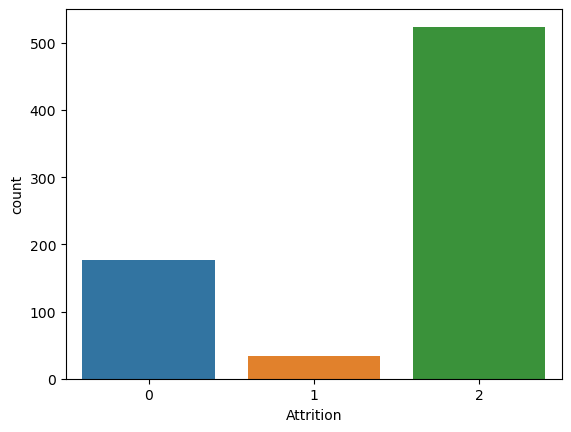

In [12]:
sns.countplot(df, x='Attrition')

In [ ]:
sns.pairplot(df)

In [15]:
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.123874,0.062387,-0.015998,0.255459,NaN,-0.094932,-0.078631,0.054464,0.508881,...,0.028908,NaN,0.051532,0.695319,-0.022505,-0.096420,0.337513,0.232541,0.202501,0.189104
Attrition,-0.123874,1.000000,-0.086031,0.083422,-0.044467,NaN,0.070840,-0.093727,-0.315538,-0.140500,...,-0.103841,NaN,-0.206806,-0.134395,-0.024925,-0.010823,-0.125287,-0.192537,-0.046842,-0.181451
DailyRate,0.062387,-0.086031,1.000000,-0.017447,-0.054348,NaN,-0.109608,0.006869,-0.045210,0.024066,...,0.000833,NaN,-0.018956,0.009893,-0.037948,-0.076059,-0.053382,0.033871,0.037576,-0.082406
DistanceFromHome,-0.015998,0.083422,-0.017447,1.000000,-0.036617,NaN,0.013250,0.028851,0.132420,-0.080029,...,0.030004,NaN,0.025674,-0.035918,-0.026752,-0.109389,0.029847,-0.002726,0.003796,0.087707
Education,0.255459,-0.044467,-0.054348,-0.036617,1.000000,NaN,-0.054923,-0.020316,-0.011168,0.189455,...,-0.051211,NaN,-0.093150,0.250357,0.057715,-0.006061,0.188329,0.191663,0.099474,0.180771
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.094932,0.070840,-0.109608,0.013250,-0.054923,NaN,1.000000,0.101027,0.080511,-0.002323,...,-0.155073,NaN,0.044043,-0.048774,-0.017221,0.008495,-0.002244,0.041354,-0.039258,-0.016402
EnvironmentSatisfaction,-0.078631,-0.093727,0.006869,0.028851,-0.020316,NaN,0.101027,1.000000,0.093283,-0.100001,...,-0.024384,NaN,0.077820,-0.091272,0.018310,0.035926,-0.064984,-0.067939,-0.057539,-0.168693
JobInvolvement,0.054464,-0.315538,-0.045210,0.132420,-0.011168,NaN,0.080511,0.093283,1.000000,-0.043519,...,-0.003334,NaN,0.101127,-0.062413,0.033885,-0.058031,-0.049725,-0.016957,-0.047101,-0.051160
JobLevel,0.508881,-0.140500,0.024066,-0.080029,0.189455,NaN,-0.002323,-0.100001,-0.043519,1.000000,...,0.070711,NaN,0.010139,0.777929,-0.030577,-0.024861,0.577547,0.499011,0.472987,0.476292


<Axes: >

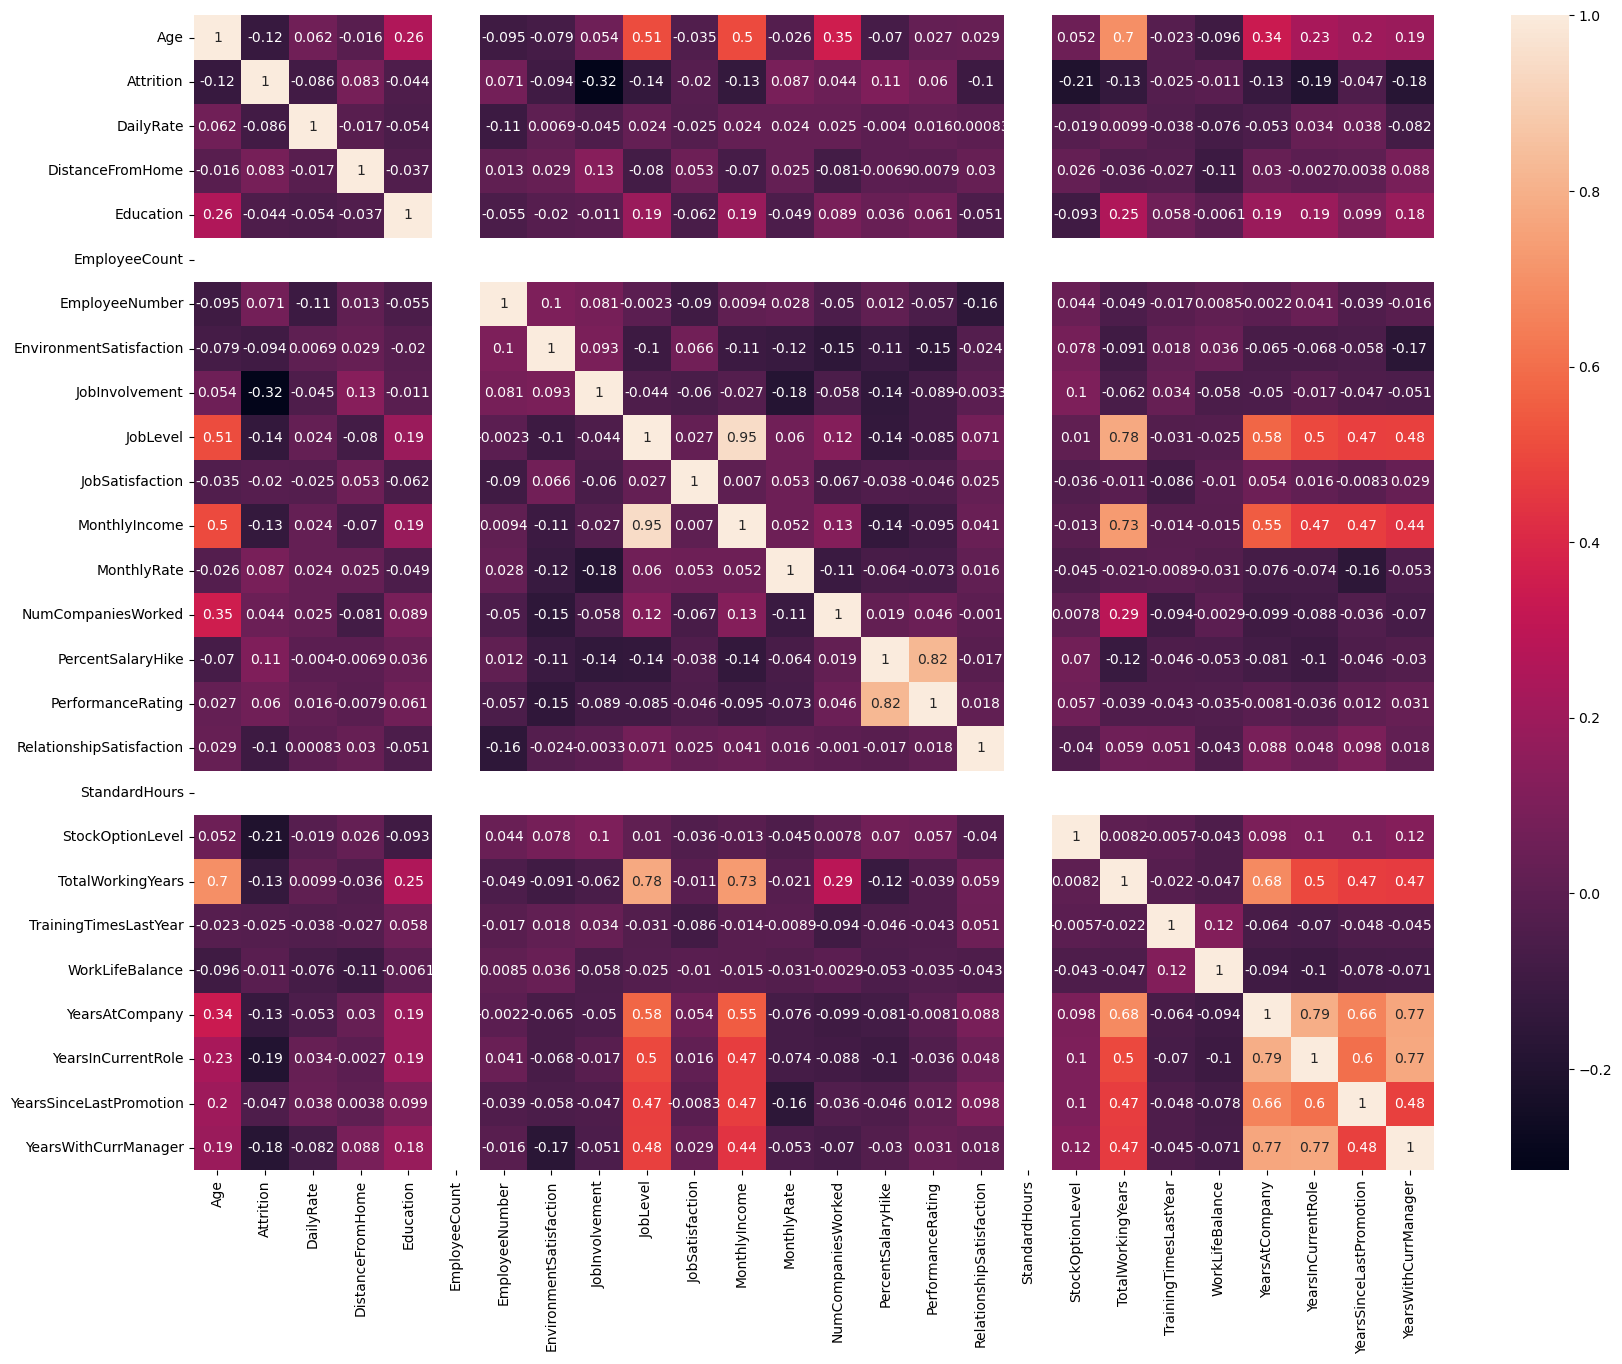

In [16]:
fig=plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

<Axes: >

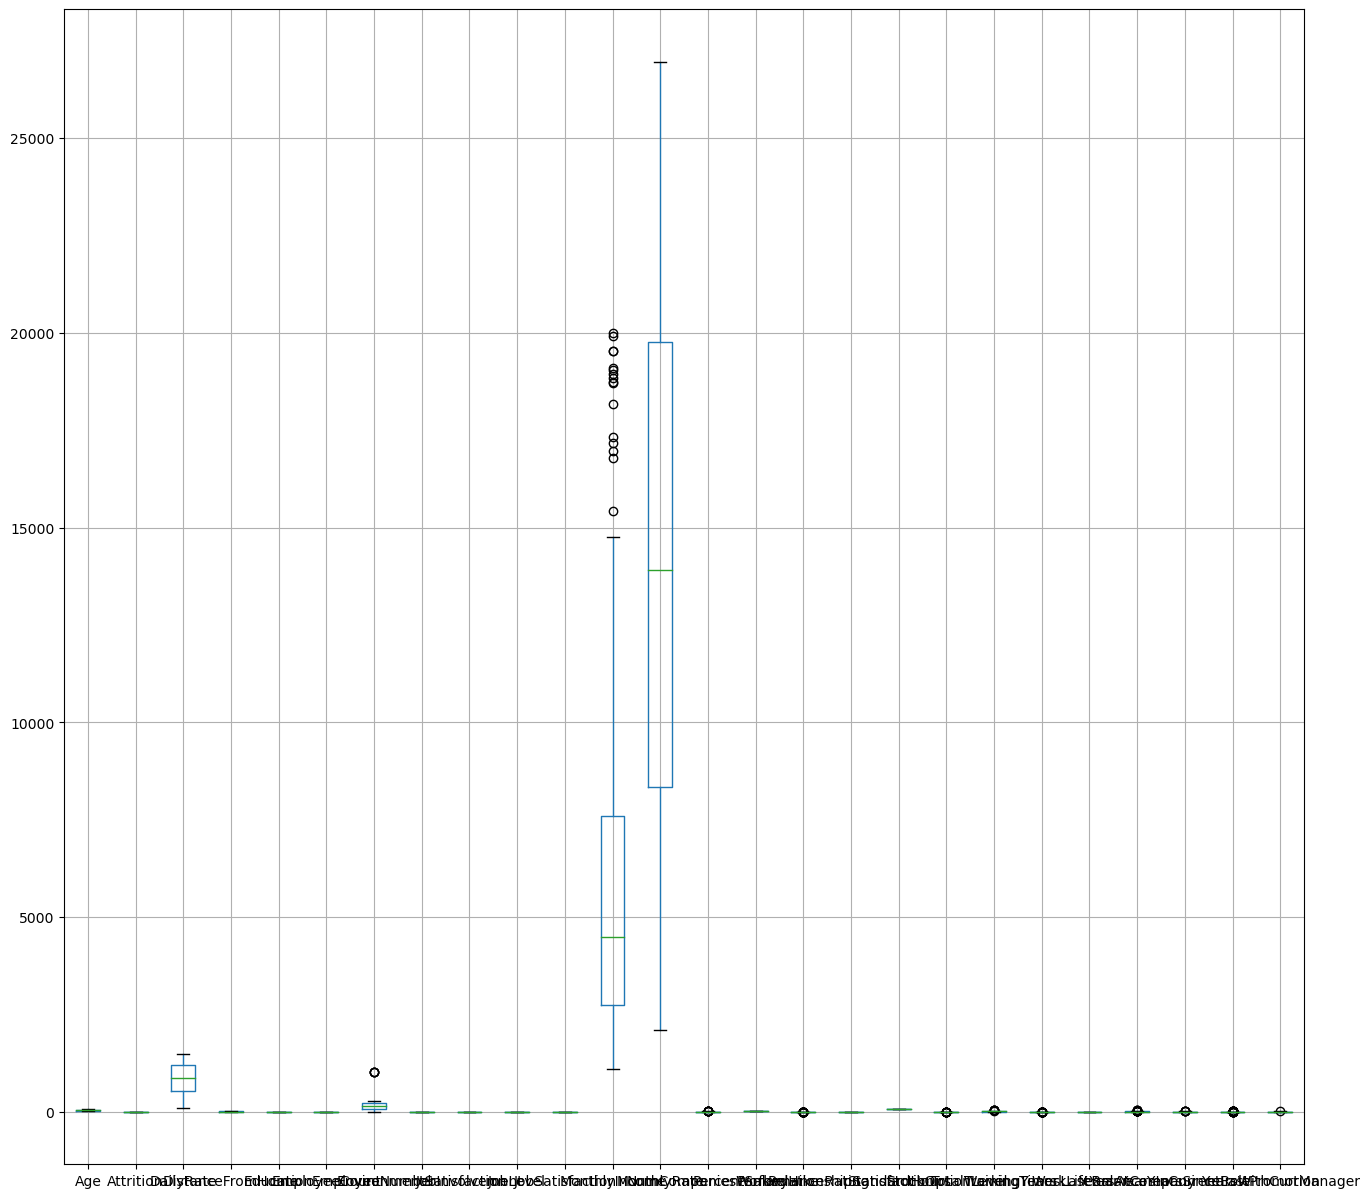

In [17]:
df.boxplot(figsize=(16,15))

In [18]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Assign X & Y

In [34]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:].values
print('X shape:\t',x.shape)
print()
print('Y shape:\t',y.shape)

X shape:	 (16, 1)

Y shape:	 (16, 1)


# Split the data for Training & Testing

In [36]:
from sklearn.model_selection import train_test_split 


# Convert 'Attrition' column to binary labels (1 for 'Yes' and 0 for 'No')
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Separate features (X) and target variable (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

xtrain, xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2, random_state=2) 

# Build the Naive Bayes - Gaussian Model

In [37]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
gauss_nb.fit(xtrain,ytrain)
print('Training Completed')
print()
ypred_gauss = gauss_nb.predict(xtest)
print('Predicted value is: \t',ypred_gauss)
print()
print('Testing completed')
print('='*75)

# Performance Measure
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
accuracy_gauss=accuracy_score(ytest,ypred_gauss)
print('*'*15 + 'Performance Measures on Gaussian Navie Bayes' + '*'*16)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred_gauss))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred_gauss))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred_gauss))
print()
print('='*75)

Training Completed

Predicted value is: 	 [0 0 0 0]

Testing completed
***************Performance Measures on Gaussian Navie Bayes****************
Accuracy score:	
 1.0


Confusion matrix:	
 [[4]]


Classification report is:	
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4




# Build the Naive Bayes - Multinomial Model

In [39]:
from sklearn.naive_bayes import MultinomialNB

mul_nb=MultinomialNB()
mul_nb.fit(xtrain, ytrain)
print('Training Completed')
print()
ypred_mul_nb= mul_nb.predict(xtest)
print('Predicted value is: \t',ypred_mul_nb)
print()
print('Testing completed')
print('='*75)


accuracy_mul_nb= accuracy_score(ytest,ypred_mul_nb)
print('***15+ Performance Measures on MultinomialNB Navie Bayes' + '*'*16) 
print('Accuracy score:\t\n', accuracy_score (ytest, ypred_mul_nb))
print()
print('='*75)
print()
print('Confusion matrix: \t\n', confusion_matrix (ytest, ypred_mul_nb))
print()
print('='*75)
print()
print('Classification report is: \t\n', classification_report (ytest,ypred_mul_nb))
print()
print('='*75)

Training Completed

Predicted value is: 	 [0 0 0 0]

Testing completed
***15+ Performance Measures on MultinomialNB Navie Bayes****************
Accuracy score:	
 1.0


Confusion matrix: 	
 [[4]]


Classification report is: 	
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4




# Build the Naive Bayes - Beurnoulli Model

In [41]:
from sklearn.naive_bayes import BernoulliNB

ber_nb=BernoulliNB()
ber_nb.fit(xtrain, ytrain)
print('Training Completed')
print()
ypred_ber_nb= ber_nb.predict(xtest)
print('Predicted value is: \t',ypred_ber_nb)
print()
print('Testing completed')
print('='*75)

accuracy_ber_nb= accuracy_score(ytest,ypred_ber_nb)
print('*'*15 + 'Performance Measures on BernoulliNB Navie Bayes' + '*'*15) 
print('Accuracy score:\t\n', accuracy_score (ytest, ypred_ber_nb))
print()
print('='*75)
print()
print('Confusion matrix: \t\n', confusion_matrix (ytest, ypred_ber_nb))
print()
print('='*75)
print()
print('Classification report is: \t\n', classification_report (ytest,ypred_ber_nb))
print()
print('='*75)

Training Completed

Predicted value is: 	 [0 0 0 0]

Testing completed
***************Performance Measures on BernoulliNB Navie Bayes***************
Accuracy score:	
 1.0


Confusion matrix: 	
 [[4]]


Classification report is: 	
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4




In [42]:
print(gauss_nb,'=',accuracy_gauss)
print(mul_nb,'=',accuracy_mul_nb)
print(ber_nb,'=',accuracy_ber_nb)

GaussianNB() = 1.0
MultinomialNB() = 1.0
BernoulliNB() = 1.0


In [43]:
x.shape

(16, 1)

# Ensemble Model

# 1. Bagging Classifier

In [44]:
#Baggingclassifier
from sklearn.ensemble import BaggingClassifier
bagc=BaggingClassifier(base_estimator=gauss_nb,n_estimators=5,random_state=2)
bagc.fit(xtrain,ytrain)#train the model
#test the model
ypred_bagc=bagc.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_bagc))
print('-'*100)
accuracy_bagc=accuracy_score(ytest,ypred_bagc)
print('Accuracy Score:\t',accuracy_bagc)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_bagc))
print('='*100)

****************************************************************************************************
Confusion Matrix:
 [[4]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 1.0
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



# 2. RandomForestClassifier model

In [45]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rand_for=RandomForestClassifier(n_estimators=10,random_state=1)
rand_for.fit(xtrain,ytrain)#train the model
#test the model
ypred_rand=rand_for.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_rand))
print('-'*100)
accuracy_rand=accuracy_score(ytest,ypred_rand)
print('Accuracy Score:\t',accuracy_rand)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_rand))
print('='*100)

****************************************************************************************************
Confusion Matrix:
 [[4]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 1.0
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [46]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rand_for=RandomForestClassifier(n_estimators=10,random_state=1)
rand_for.fit(xtrain,ytrain)#train the model
#test the model
ypred_rand=rand_for.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_rand))
print('-'*100)
accuracy_rand=accuracy_score(ytest,ypred_rand)
print('Accuracy Score:\t',accuracy_rand)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_rand))
print('='*100)

****************************************************************************************************
Confusion Matrix:
 [[4]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 1.0
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



# 3. ExtraTrees model

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree=ExtraTreesClassifier(n_estimators=10,bootstrap=True,verbose=2)
extra_tree.fit(xtrain,ytrain)#train the model
#test the model
ypred_extra=extra_tree.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_extra))
print('-'*100)
accuracy_extra=accuracy_score(ytest,ypred_extra)
print('Accuracy Score:\t',accuracy_extra)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_extra))
print('='*100)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
****************************************************************************************************
Confusion Matrix:
 [[4]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 1.0
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


# Model with Accuracy scores

In [53]:
scores=[('Gaussian_NB',accuracy_gauss),
        ('Multinomial_NB',accuracy_mul_nb),
        ('Bernoulli_NB',accuracy_ber_nb),
        ('Bagging_classifier',accuracy_bagc),
        ('RandomForest Classifier',accuracy_rand),
        ('ExtraTrees Classifier',accuracy_extra)

         ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))


                     Model  Accuracy_score
0              Gaussian_NB             1.0
1           Multinomial_NB             1.0
2             Bernoulli_NB             1.0
3       Bagging_classifier             1.0
4  RandomForest Classifier             1.0
5    ExtraTrees Classifier             1.0


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Gaussian_NB'),
  Text(1, 0, 'Multinomial_NB'),
  Text(2, 0, 'Bernoulli_NB'),
  Text(3, 0, 'Bagging_classifier'),
  Text(4, 0, 'RandomForest Classifier'),
  Text(5, 0, 'ExtraTrees Classifier')])

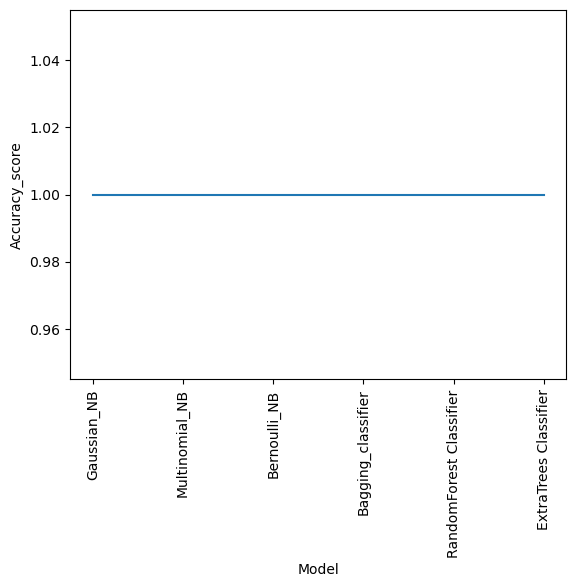

In [54]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores['Accuracy_score'])
plt.xticks(rotation=90)